<a href="https://colab.research.google.com/github/aiswaryalakshmi/Data-Science-Course/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
cd '/content/gdrive/My Drive/CSE544_Project'

/content/gdrive/.shortcut-targets-by-id/15mLPgz-zcOGnxUvkSF74cjYj0ir0JlMq/CSE544_Project


#Data Cleaning

In [12]:
import pandas as pd

#Read the dataframe
df = pd.read_csv('latimes-place-totals.csv')
df1 = df[df['county']=='Los Angeles']
df1['confirmed_cases'].max()

709

In [13]:
#Check Null Values
df1.isna().sum()

date                  0
county                0
fips                  0
place                 0
confirmed_cases       0
note               9562
x                     8
y                     8
dtype: int64

In [0]:
#Check for unique values - to check for their usage in inference
df['note'].unique()

array([nan, '9 or fewer', '4 or fewer', '5 to 9', '10 to 20', '1 to 4',
       '1 to 5'], dtype=object)

In [0]:
#Since, the note column is of no use for inference. We can Drop it.
df2 = df1.drop(['note'],axis=1)
df3 = df2.drop(['x'],axis=1)
df4 = df3.drop(['y'],axis=1)

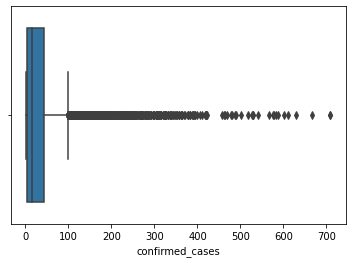

In [0]:
#Check for Outliers
import seaborn as sns
sns.boxplot(x=df4['confirmed_cases'])

In [0]:
df4['place'].unique()

array(['Alhambra', 'Arcadia', 'Beverly Hills', 'Boyle Heights', 'Carson',
       'Culver City', 'Diamond Bar', 'Encino', 'Gardena', 'Glendale',
       'Glendora', 'Granada Hills', 'Inglewood', 'Koreatown', 'La Mirada',
       'Lancaster', 'Long Beach', 'Manhattan Beach', 'Melrose',
       'Northridge', 'Pasadena', 'San Dimas', 'San Pedro',
       'Santa Clarita and Stevenson Ranch', 'Santa Monica',
       'Sherman Oaks', 'Silver Lake', 'Smaller Los Angeles neighborhoods',
       'South Pasadena', 'Tarzana', 'Torrance', 'Venice', 'West Adams',
       'West Hills', 'West Hollywood', 'West Vernon', 'Westchester',
       'Altadena', 'Baldwin Hills', 'Brentwood', 'Eagle Rock', 'Lynwood',
       'Mar Vista', 'Monterey Park', 'North Hollywood', 'Santa Clarita',
       'Woodland Hills', 'Century Palms/Cove', 'Hollywood',
       'Hollywood Hills', 'Sylmar', 'Walnut', 'West Los Angeles',
       'Beverlywood', 'Burbank', 'Calabasas', 'Castaic', 'Century City',
       'Covina', 'Crestview', 'East 

In [0]:
df5 = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df2=df2.dropna()


In [0]:
import datetime as dt
df5['Date Rptd'] = df5['Date Rptd'].apply(lambda x:dt.datetime.strptime(x,'%m/%d/%Y %H:%M:%S AM'))

In [0]:
df5['Date Rptd'] = pd.to_datetime(df5['Date Rptd']).dt.date
df5.rename(columns={'Date Rptd': 'date'}, inplace=True)
df6=pd.merge(df4, df5, on='date')
df8=df4.merge(df5, left_index=True, right_index=True)
df9 = df8.drop(['Mocodes'],axis=1)


In [0]:
df9

,date_x,county,fips,place,confirmed_cases,DR_NO,date_y,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1867,2020-03-16,Los Angeles,37,Alhambra,2,200205035,2020-01-19,01/19/2020 12:00:00 AM,1520,2,Rampart,236,2,901,VIOLATION OF RESTRAINING ORDER,38,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,901,NaN,NaN,NaN,100 S ALVARADO ST,NaN,34.0667,-118.2703
1868,2020-03-16,Los Angeles,37,Arcadia,1,200205036,2020-01-16,01/16/2020 12:00:00 AM,1,2,Rampart,217,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",33,F,W,122.0,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,740,NaN,NaN,NaN,400 N WESTLAKE AV,NaN,34.0698,-118.2665
1869,2020-03-16,Los Angeles,37,Beverly Hills,1,200205037,2020-01-19,01/19/2020 12:00:00 AM,1430,2,Rampart,201,2,946,OTHER MISCELLANEOUS CRIME,26,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,946,NaN,NaN,NaN,1000 N MARIPOSA AV,NaN,34.0891,-118.2992
1870,2020-03-16,Los Angeles,37,Boyle Heights,5,200205038,2020-01-19,01/19/2020 12:00:00 AM,245,2,Rampart,231,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",32,M,O,122.0,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,740,NaN,NaN,NaN,3200 W TEMPLE ST,NaN,34.0753,-118.2812
1871,2020-03-16,Los Angeles,37,Carson,1,200205039,2020-01-20,01/19/2020 12:00:00 AM,1400,2,Rampart,233,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",49,F,H,122.0,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,740,NaN,NaN,NaN,OCCIDENTAL BL,6TH ST,34.0697,-118.2779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13079,2020-05-02,Los Angeles,37,Wilmington,98,200607468,2020-03-07,03/07/2020 12:00:00 AM,35,6,Hollywood,639,2,624,BATTERY - SIMPLE ASSAULT,37,M,W,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624,NaN,NaN,NaN,5200 HOLLYWOOD BL,NaN,34.1036,-118.3049
13080,2020-05-02,Los Angeles,37,Wilshire Center,120,201306105,2020-02-06,02/06/2020 12:00:00 AM,1215,13,Newton,1321,2,940,EXTORTION,22,M,A,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,940,NaN,NaN,NaN,300 W ADAMS BL,NaN,34.0289,-118.2686
13081,2020-05-02,Los Angeles,37,Winnetka,165,201306107,2020-02-06,02/05/2020 12:00:00 AM,2000,13,Newton,1394,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),24,F,H,101.0,STREET,NaN,NaN,IC,Invest Cont,745,NaN,NaN,NaN,6600 S SAN PEDRO ST,NaN,33.9786,-118.2717
13082,2020-05-02,Los Angeles,37,Wiseburn,8,201408887,2020-03-26,03/26/2020 12:00:00 AM,2245,14,Pacific,1494,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,38,F,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,626,NaN,NaN,NaN,AVION,CENTURY BL,33.9455,-118.3901


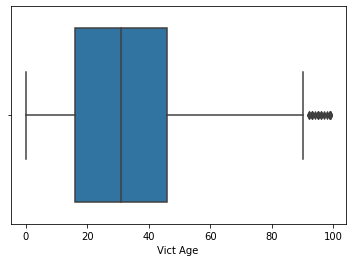

In [0]:
df9.rename(columns={'date_x': 'date'}, inplace=True)

import seaborn as sns
sns.boxplot(x=df9['Vict Age'])

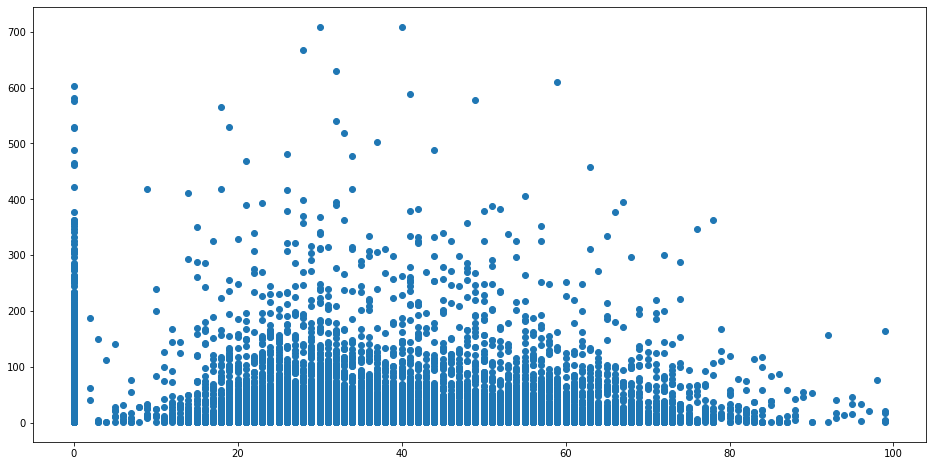

In [0]:
#Before Removing Outlier
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df9['Vict Age'], df9['confirmed_cases'])
plt.show()

##Tukey's Rule for Outlier 

In [0]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df10=remove_outlier(df9,'confirmed_cases')
df11=remove_outlier(df10,'Vict Age')
df12=remove_outlier(df11,'AREA')

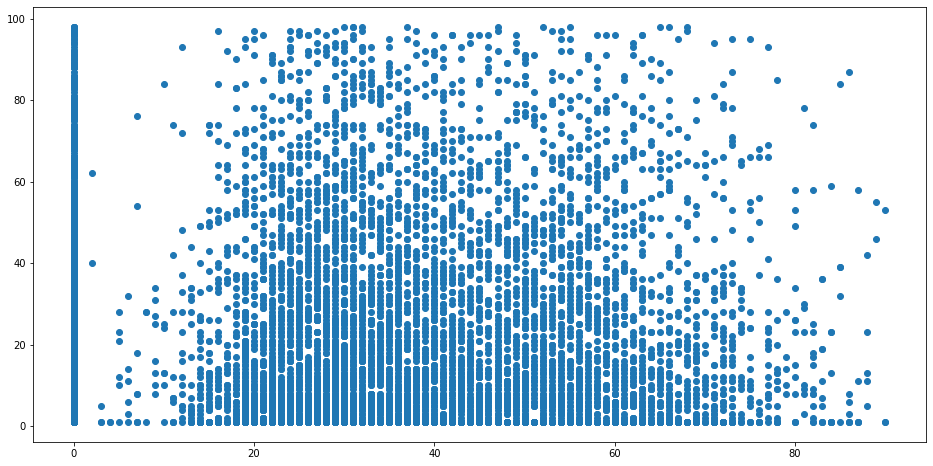

fips                    0.0000
confirmed_cases        29.0000
DR_NO              601049.0000
TIME OCC              980.0000
AREA                    6.0000
Rpt Dist No           643.0000
Part 1-2                1.0000
Crm Cd                296.0000
Vict Age               29.0000
Premis Cd             400.0000
Weapon Used Cd          0.0000
Crm Cd 1              296.0000
Crm Cd 2                0.0000
Crm Cd 3                0.0000
Crm Cd 4                   NaN
LAT                     0.0925
LON                     0.1036
dtype: float64


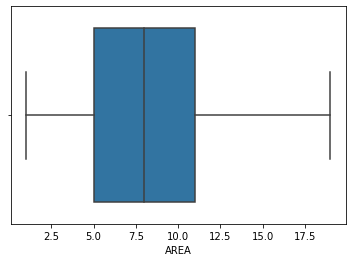

In [0]:
#After Removing Outlier
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df11['Vict Age'], df11['confirmed_cases'])
plt.show()


import seaborn as sns
sns.boxplot(x=df12['AREA'])

Q1 = df12.quantile(0.25)
Q3 = df12.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Visualizations:

### Pie Chart

The pie-graph which shows the area wise crime rate in LA from January to May.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,4,6,7,8,10,12,16,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


{'Southwest': 3168, 'Central': 3642, 'N Hollywood': 2642, 'Mission': 2283, 'Devonshire': 2146, 'Harbor': 2276, 'Northeast': 2347, 'West LA': 2486, 'West Valley': 2295, 'Pacific': 2879, 'Foothill': 1893, 'Southeast': 2948, 'Rampart': 2463, 'Van Nuys': 2373, 'Hollywood': 2906, 'Hollenbeck': 1993, 'Wilshire': 2499, 'Newton': 2580, 'Topanga': 2376, 'Olympic': 2504, '77th Street': 3514}


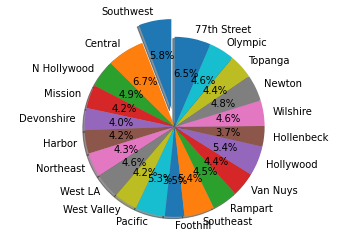

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import math 

data = pd.read_csv("CrimeData.csv",header = None)
#print(data[5])
dic = {}
total = 0
for i in data[5]:
    if i in dic:
       dic[i] = dic[i]+1
    else:
       dic[i] = 1 

dic.pop('AREA NAME')
print(dic)
labels = []
sizes = []
explode = []
for i in dic:
   labels.append(i)
   sizes.append(dic[i])
   explode.append(0)
explode[0] = 0.2
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Bar Graph

The bargraph shows the age group vs cases.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,4,6,7,8,10,12,16,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


{'Children': 10804, 'Adult': 23366, 'Old Aged': 20044}


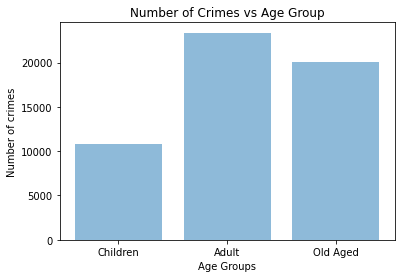

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

data = pd.read_csv("CrimeData.csv",header = None)
#print(data[5])
dic = {'Children' : 0, 'Adult' : 0, 'Old Aged' : 0} 
total = 0
for i in data[10]:
    if str(i) >= str(0) and str(i) <= str(20):
       dic['Children'] = dic['Children']+1
    elif str(i) >= str(21) and str(i) <= str(40):
       dic['Adult'] = dic['Adult']+1
    else:
       dic['Old Aged'] = dic['Old Aged']+1
print(dic)
xAxis = []
yAxis = []
for i in dic:
    xAxis.append(i)
    yAxis.append(dic[i])

y_pos = np.arange(len(xAxis))

plt.bar(y_pos, yAxis, align='center', alpha=0.5)
plt.xticks(y_pos, xAxis)
plt.ylabel('Number of crimes')
plt.xlabel('Age Groups')
plt.title('Number of Crimes vs Age Group')
plt.show()






### Time Series Plot - 1

The time series shows the confirmed corona cases vs crimes from March to May.

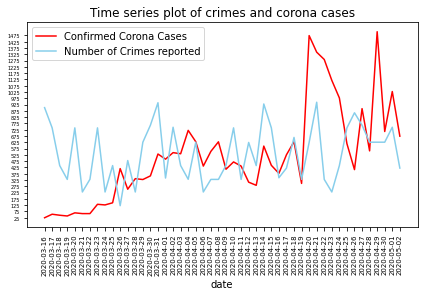

In [0]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("New_Covid_Crime.csv",header = None)
x = data[1]
y = data[2]
y1 = data[4]
x = x[1:len(x)]
y = y[1:len(y)]
y1 = y1[1:len(y1)]
y = list(map(int, y))
y1 = list(map(int, y1))
plt.plot(x,y, 'k', label='Confirmed Corona Cases', color='red')
plt.plot(x,y1, 'k', label='Number of Crimes reported', color='skyblue')
plt.yticks(np.arange(min(min(y), min(y1)), max(max(y), max(y1)), 50))
plt.xlabel("date")
plt.xticks(x, rotation=90)
plt.tick_params(axis='x', which='major', labelsize=7)
plt.tick_params(axis='y', which='major', labelsize=5)
plt.tight_layout()
plt.title("Time series plot of crimes and corona cases")
plt.legend()
plt.show()






### Time Series Plot - 2

The time series shows the confirmed corona cases vs deaths from March to May.

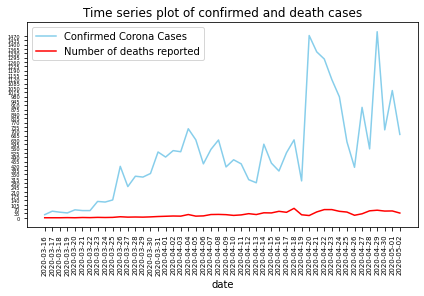

In [0]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("New_Covid_Crime.csv",header = None)
x = data[1]
y = data[2]
y1 = data[3]
x = x[1:len(x)]
y = y[1:len(y)]
y1 = y1[1:len(y1)]
y = list(map(int, y))
y1 = list(map(int, y1))
plt.plot(x,y, 'k', label='Confirmed Corona Cases', color='skyblue')
plt.plot(x,y1, 'k', label='Number of deaths reported', color='red')
plt.yticks(np.arange(min(min(y), min(y1)), max(max(y), max(y1)), 35))
plt.xlabel("date")
plt.xticks(x, rotation=90)
plt.tick_params(axis='x', which='major', labelsize=7)
plt.tick_params(axis='y', which='major', labelsize=5)
plt.tight_layout()
plt.title("Time series plot of confirmed and death cases")
plt.legend()
plt.show()






# Required Inference 1

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import pandas as pd
import math

data = pd.read_csv('covidLA.txt',sep=',')
data['date'] = pd.to_datetime(data['date'])
LAdata = data[data['county']=='Los Angeles']
LAaprildata = LAdata.loc[(LAdata['date']>='2020-04-01')&(LAdata['date']<='2020-04-28')]
LAdata = LAdata.reset_index()
LAaprildata = LAaprildata.reset_index()
LAdata['new_deaths'][np.isnan(LAdata['new_deaths'])] = 0
LAdata['new_confirmed_cases'][np.isnan(LAdata['new_confirmed_cases'])] = 0

covid_crime_data = pd.read_csv('New_Covid_Crime.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Auto Regression

In [0]:
def beta_calc(x_matrix, y_matrix):
  return np.dot(np.linalg.pinv(np.dot(x_matrix.transpose(), x_matrix)), np.dot(x_matrix.transpose(), y_matrix))

### AR(3)

In [0]:
def ar3(b0, b1, b2, b3, yt, ytm1, ytm2):
  return b0 + b1 * yt + b2 * ytm1 + b3 * ytm2

In [0]:
def calc_ar3(data, column_name):
  answer = list()
  for i in range(len(data.index)):
    row_count = 0
    if i < 3:
      continue
    x_matrix = np.zeros(shape=(i-2, 4), dtype=int)
    y_matrix = np.zeros(shape=(i-2, 1), dtype=int)
    for j in range(i, -1, -1):
      if j-3 < 0:
        break
      x_matrix[row_count, 0] = 1
      x_matrix[row_count, 1] = data[column_name].iloc[j-1]
      x_matrix[row_count, 2] = data[column_name].iloc[j-2]
      x_matrix[row_count, 3] = data[column_name].iloc[j-3]
      y_matrix[row_count, 0] = data[column_name].iloc[j]
      row_count += 1
    beta_matrix = beta_calc(x_matrix, y_matrix)
    ans = ar3(beta_matrix[0,0], beta_matrix[1,0], beta_matrix[2,0], beta_matrix[3,0], x_matrix[0, 1], x_matrix[0, 2], x_matrix[0, 3])
    answer.append(ans)
  return answer

### AR(5)

In [0]:
def ar5(b0, b1, b2, b3, b4, b5, yt, ytm1, ytm2, ytm3, ytm4):
  return b0 + b1 * yt + b2 * ytm1 + b3 * ytm2 + b4 * ytm3 + b5 * ytm4

In [0]:
def calc_ar5(data, column_name):
  answer = list()
  for i in range(len(data.index)):
    row_count = 0
    if i < 5:
      continue
    x_matrix = np.zeros(shape=(i-4, 6), dtype=int)
    y_matrix = np.zeros(shape=(i-4, 1), dtype=int)
    for j in range(i, -1, -1):
      if j-5 < 0:
        break
      x_matrix[row_count, 0] = 1
      x_matrix[row_count, 1] = data[column_name].iloc[j-1]
      x_matrix[row_count, 2] = data[column_name].iloc[j-2]
      x_matrix[row_count, 3] = data[column_name].iloc[j-3]
      x_matrix[row_count, 4] = data[column_name].iloc[j-4]
      x_matrix[row_count, 5] = data[column_name].iloc[j-5]
      y_matrix[row_count, 0] = data[column_name].iloc[j]
      row_count += 1
    beta_matrix = beta_calc(x_matrix, y_matrix)
    answer.append(ar5(beta_matrix[0,0], beta_matrix[1,0], beta_matrix[2,0], beta_matrix[3,0], beta_matrix[4,0], beta_matrix[5,0], x_matrix[0, 1],
                      x_matrix[0, 2], x_matrix[0, 3], x_matrix[0, 4], x_matrix[0, 5]))
  return answer

## EWMA

In [0]:
def ewma(prev_actual, prev_estimated, alpha):
  return alpha * prev_actual + (1 - alpha) * prev_estimated

In [0]:
def calc_ewma(data, column_name, alpha):
  result = list()
  prev_estimated = data[column_name].iloc[0]
  for i in data[column_name]:
    cur_estimate = ewma(i, prev_estimated, alpha)
    prev_estimated = cur_estimate
    result.append(cur_estimate)
  return result

## MAPE

In [0]:
def mape(actual_arr, estimate_arr):
  return np.sum((actual_arr - estimate_arr) * 100 / actual_arr)/len(actual_arr)

## MSE

In [0]:
def mse(actual_arr, estimate_arr):
  return np.sum((actual_arr - estimate_arr) ** 2)/len(actual_arr)

## Results

### Fatality

Fatality:
AR(3)
MAPE:-0.9528296218757077
MSE:253.05921521461738

AR(5)
MAPE:-12.67259150474256
MSE:128.4258674316737

EWMA with alpha = 0.5
MAPE:-6.905249685927485
MSE:90.85018250812661

EWMA with alpha = 0.8
MAPE:-2.0872297935787865
MSE:13.156786527184348



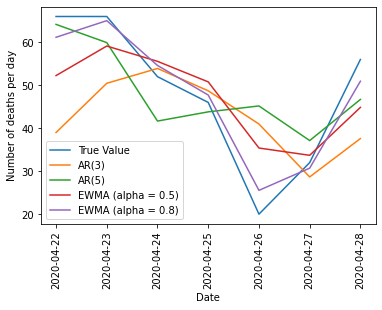

In [0]:
print("Fatality:")
death_estimate = calc_ar3(LAaprildata, 'new_deaths')
print("AR(3)")
print("MAPE:" + str(mape(LAaprildata["new_deaths"].truncate(before=21).to_numpy(), np.array(death_estimate[-7:]))))
print("MSE:" + str(mse(LAaprildata["new_deaths"].truncate(before=21).to_numpy(), np.array(death_estimate[-7:]))))
print()
plt.plot(LAaprildata["date"].truncate(before=21), LAaprildata["new_deaths"].truncate(before=21),label = 'True Value')
plt.plot(LAaprildata["date"].truncate(before=21), death_estimate[-7:],label = 'AR(3)')

death_estimate = calc_ar5(LAaprildata, 'new_deaths')
print("AR(5)")
print("MAPE:" + str(mape(LAaprildata["new_deaths"].truncate(before=21).to_numpy(), np.array(death_estimate[-7:]))))
print("MSE:" + str(mse(LAaprildata["new_deaths"].truncate(before=21).to_numpy(), np.array(death_estimate[-7:]))))
print()
plt.plot(LAaprildata["date"].truncate(before=21), death_estimate[-7:],label = 'AR(5)')

death_estimate = calc_ewma(LAaprildata, 'new_deaths', 0.5)
print("EWMA with alpha = 0.5")
print("MAPE:" + str(mape(LAaprildata["new_deaths"].truncate(before=21).to_numpy(), np.array(death_estimate[-7:]))))
print("MSE:" + str(mse(LAaprildata["new_deaths"].truncate(before=21).to_numpy(), np.array(death_estimate[-7:]))))
print()
plt.plot(LAaprildata["date"].truncate(before=21), death_estimate[-7:],label = 'EWMA (alpha = 0.5)')

death_estimate = calc_ewma(LAaprildata, 'new_deaths', 0.8)
print("EWMA with alpha = 0.8")
print("MAPE:" + str(mape(LAaprildata["new_deaths"].truncate(before=21).to_numpy(), np.array(death_estimate[-7:]))))
print("MSE:" + str(mse(LAaprildata["new_deaths"].truncate(before=21).to_numpy(), np.array(death_estimate[-7:]))))
print()
plt.plot(LAaprildata["date"].truncate(before=21), death_estimate[-7:],label = 'EWMA (alpha = 0.8)')

plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Number of deaths per day")
plt.legend()
plt.show()

### Number of cases

Number of cases:
AR(3)
MAPE:-14.572763123333857
MSE:43724.28578527355

AR(5)
MAPE:10.418276614257623
MSE:39541.23734800925

EWMA with alpha = 0.5
MAPE:-14.626184192122368
MSE:20561.412726533803

EWMA with alpha = 0.8
MAPE:-4.817339819277847
MSE:3137.1933945981364



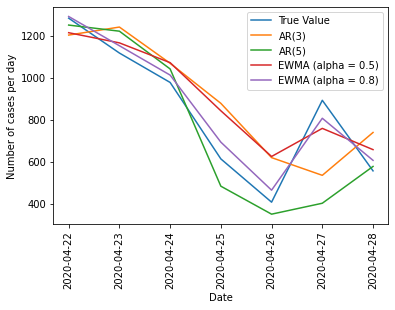

In [0]:
print("Number of cases:")
no_of_cases_estimate = calc_ar3(LAaprildata, 'new_confirmed_cases')
print("AR(3)")
print("MAPE:" + str(mape(LAaprildata["new_confirmed_cases"].truncate(before=21).to_numpy(), np.array(no_of_cases_estimate[-7:]))))
print("MSE:" + str(mse(LAaprildata["new_confirmed_cases"].truncate(before=21).to_numpy(), np.array(no_of_cases_estimate[-7:]))))
print()
plt.plot(LAaprildata["date"].truncate(before=21), LAaprildata["new_confirmed_cases"].truncate(before=21),label = 'True Value')
plt.plot(LAaprildata["date"].truncate(before=21), no_of_cases_estimate[-7:],label = 'AR(3)')

no_of_cases_estimate = calc_ar5(LAaprildata, 'new_confirmed_cases')
print("AR(5)")
print("MAPE:" + str(mape(LAaprildata["new_confirmed_cases"].truncate(before=21).to_numpy(), np.array(no_of_cases_estimate[-7:]))))
print("MSE:" + str(mse(LAaprildata["new_confirmed_cases"].truncate(before=21).to_numpy(), np.array(no_of_cases_estimate[-7:]))))
print()
plt.plot(LAaprildata["date"].truncate(before=21), no_of_cases_estimate[-7:],label = 'AR(5)')

no_of_cases_estimate = calc_ewma(LAaprildata, 'new_confirmed_cases', 0.5)
print("EWMA with alpha = 0.5")
print("MAPE:" + str(mape(LAaprildata["new_confirmed_cases"].truncate(before=21).to_numpy(), np.array(no_of_cases_estimate[-7:]))))
print("MSE:" + str(mse(LAaprildata["new_confirmed_cases"].truncate(before=21).to_numpy(), np.array(no_of_cases_estimate[-7:]))))
print()
plt.plot(LAaprildata["date"].truncate(before=21), no_of_cases_estimate[-7:],label = 'EWMA (alpha = 0.5)')

no_of_cases_estimate = calc_ewma(LAaprildata, 'new_confirmed_cases', 0.8)
print("EWMA with alpha = 0.8")
print("MAPE:" + str(mape(LAaprildata["new_confirmed_cases"].truncate(before=21).to_numpy(), np.array(no_of_cases_estimate[-7:]))))
print("MSE:" + str(mse(LAaprildata["new_confirmed_cases"].truncate(before=21).to_numpy(), np.array(no_of_cases_estimate[-7:]))))
print()
plt.plot(LAaprildata["date"].truncate(before=21), no_of_cases_estimate[-7:],label = 'EWMA (alpha = 0.8)')

plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Number of cases per day")
plt.legend()
plt.show()

## Observations

As can be seen in the above two plots, EWMA with alpha = 0.8 gives us the estimates very close to the true values both for number of cases and deaths per day.

# Required Inference 2

## Wald's one sample and two sample test

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson

def waldstest1sample(data1,data2):
    #mle for poission distribution is mean
    mle=np.mean(data2)
    #se for poission distribution is sqrt(mle/n)
    se=math.sqrt(mle/len(data1))
    initiallambda=np.mean(data1)
    #using the formula for w
    w=(mle-initiallambda)/(math.sqrt(mle)/math.sqrt(len(data1)))
    #reject null hypothesis if abs(w)>critical threshold,else accept
    if abs(w)>1.96:
        print("For one sample Null hypothesis is rejected as w values is ",abs(w))
    else:
        print("For one sample Null hypothesis is accepted as w values is ",abs(w))
        
def waldstest2sample(data1,data2):
    diff=np.mean(data1)-np.mean(data2)
    se=math.sqrt((np.mean(data1)/len(data1))+(np.mean(data2)/len(data2)))
    w=abs(diff/se)
    #reject null hypothesis if abs(w)>critical threshold,else accept
    if abs(w)>1.96:
        print("For two sample Null hypothesis is rejected as w values is ",abs(w))
    else:
        print("For two sample Null hypothesis is accepted as w values is ",abs(w))
data = pd.read_csv('New_Covid_Crime.csv')
df = pd.DataFrame(data, columns = ['date', 'new_confirmed_cases','new_deaths'])
lastweekstart_date = "2020-04-26"
lastweekend_date = "2020-05-02"
after_start_date = df["date"] >= lastweekstart_date
before_end_date = df["date"] <= lastweekend_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]
#To get data for confirmed cases and deaths for last week
lastweek=filtered_dates
start_date = "2020-04-19"
end_date = "2020-04-25"
after_start_date = df["date"] >= start_date
before_end_date = df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]
#to get data for confirmed cases and deaths for second last week
secondweek=filtered_dates
secondweek_confirmed_cases=secondweek['new_confirmed_cases']
lastweek_confirmed_cases=lastweek['new_confirmed_cases']
data1 = secondweek_confirmed_cases.to_numpy()
data2=lastweek_confirmed_cases.to_numpy()
print("-----Inference for confirmed cases-------")
waldstest1sample(data1,data2)
waldstest2sample(data1,data2)
print("-----Inference for #deaths-------")
secondweek_confirmed_cases=secondweek['new_deaths']
lastweek_confirmed_cases=lastweek['new_deaths']
data1 = secondweek_confirmed_cases.to_numpy()
data2=lastweek_confirmed_cases.to_numpy()
waldstest1sample(data1,data2)
waldstest2sample(data1,data2)


-----Inference for confirmed cases-------
For one sample Null hypothesis is rejected as w values is  17.511642063350024
For two sample Null hypothesis is rejected as w values is  11.725620767473908
-----Inference for #deaths-------
For one sample Null hypothesis is accepted as w values is  0.16876318513890157
For two sample Null hypothesis is accepted as w values is  0.11905136851988035


### Result
***Note :Derivation done in required_inference_2.pdf file present in the drive***

**Confirmed Cases**

For one sample test the Null hypothesis is that mean of COVID19 confirmed cases of last week is same as true mean.
Alternate hypothesis is that mean of COVID19 confirmed cases of last week is not same as true mean.As w value is 17.511>1.96 hence null hypothesis is rejected.

For two sample test the null hypothesis is that last week data and second last week data of confirmed cases come frome same distributions.
Alternate hypothesis is that they come from different distributions as w value is 11.7256 > 1.96 hence null hypothesis is rejected.

**#Deaths**

For one sample test the Null hypothesis is mean of COVID19 #deaths is same from the second last week to last week.
Alternate hypothesis is mean of COVID19 confirmed cases is different from the second last week to last week.
As w value is 0.168< 1.96 hence null hypothesis is accepted.

For two sample test the null hypothesis is that both last week data and second last week data of #deaths come frome same distributions.
Alternate hypothesis is that they come from different distributions as w value is 0.199 < 1.96 hence null hypothesis is accepted.

Note:For two sample wald's test the two populations should be independent.This is the assumption.

Applicability of test:This walds test may not be aplicable here as the sample size is only 7 hence we cannot tell if it is asymptotic distribution.

## One sample t-test

In [0]:
from scipy.stats import norm

def one_sample_T_test(X,guess_mean):
    
    mu, std = norm.fit(X)
    plt.hist(X, bins=7, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "One sample t-test: Plot of X. Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

    n = len(X)
    sample_std = np.std(X)
    t_statistic = ((np.mean(X)-guess_mean)/sample_std)*math.sqrt(n)


    # t_alpha_by2 (two tailed test) for df = 6 (=7-1) and significant value of 0.05. This is obatined from the T-table.
    t_alpha_by2 = 2.447

    if abs(t_statistic) > t_alpha_by2:
        print('The null hypothesis is rejected')
    else:
        print('The null hypothesis is accepted')
    print('The T-statistic value = ', str(t_statistic))
    print('The t_alpha_by2 value for 95% statistical confidence for two tailed test with df=6 is ' + str(t_alpha_by2))

## Paired t-test

In [0]:
def paired_T_test(X,Y):
    
    D = X-Y
    mu, std = norm.fit(D)
    plt.hist(D, bins=7, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Paired t-test: Plot of Difference of X and Y. Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()
    
    n = len(D)
    sample_std = np.std(D)
    t_statistic = ((np.mean(D)/sample_std)*math.sqrt(n))

    # t_alpha_by2 (two tailed test) for df = 6 (=7-1) and significant value of 0.05. This is obatined from the T-table.
    t_alpha_by2 = 2.447

    if abs(t_statistic) > t_alpha_by2:
        print('The null hypothesis is rejected')
    else:
        print('The null hypothesis is accepted')
    print('The T-statistic value = ', str(t_statistic))
    print('The t_alpha_by2 value for 95% statistical confidence for two tailed test with df=6 is ' + str(t_alpha_by2))

## Unpaired t-test

In [0]:
def unpaired_T_test(X,Y):
    
    D = X-Y
    X_std = np.std(X)
    Y_std = np.std(Y)

    mu = np.mean(D)
    std = math.sqrt( X_std * X_std / len(X) + Y_std * Y_std / len(Y) )
    plt.hist(D, bins=7, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Unpaired t-test: Plot of Difference of X and Y. Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()
    
    t_statistic = mu/math.sqrt( X_std * X_std / len(X) + Y_std * Y_std / len(Y) )

    # t_alpha_by2 (two tailed test) for df = 12 (=7+7-2) and significant value of 0.05. This is obatined from the T-table.
    t_alpha_by2 = 2.179

    if abs(t_statistic) > t_alpha_by2:
        print('The null hypothesis is rejected')
    else:
        print('The null hypothesis is accepted')
    print('The T-statistic value = ', str(t_statistic))
    print('The t_alpha_by2 value for 95% statistical confidence for two tailed test with df=12 is ' + str(t_alpha_by2))

## Results

### Fatality

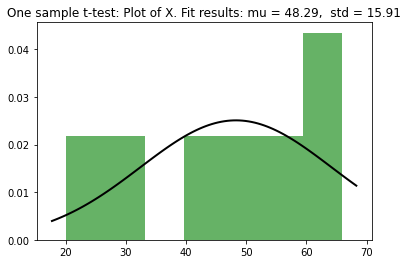

The null hypothesis is accepted
The T-statistic value =  0.9028628302918341
The t_alpha_by2 value for 95% statistical confidence for two tailed test with df=6 is 2.447


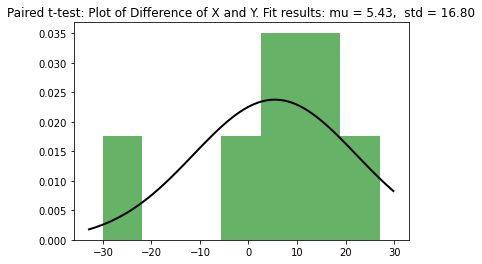

The null hypothesis is accepted
The T-statistic value =  0.8549122233403703
The t_alpha_by2 value for 95% statistical confidence for two tailed test with df=6 is 2.447


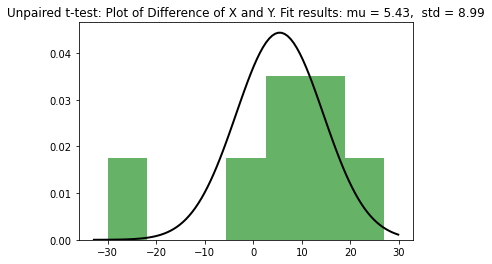

The null hypothesis is accepted
The T-statistic value =  0.6038378567759808
The t_alpha_by2 value for 95% statistical confidence for two tailed test with df=12 is 2.179


In [0]:
LAaprilLastWeekdata = LAdata.loc[(LAdata['date']>='2020-04-22')&(LAdata['date']<='2020-04-28')]
LAaprilPrevToLastWeekdata = LAdata.loc[(LAdata['date']>='2020-04-15')&(LAdata['date']<='2020-04-21')]

one_sample_T_test(np.array(LAaprilLastWeekdata.new_deaths), LAaprilPrevToLastWeekdata["new_deaths"].mean())
paired_T_test(np.array(LAaprilLastWeekdata.new_deaths), np.array(LAaprilPrevToLastWeekdata.new_deaths))
unpaired_T_test(np.array(LAaprilLastWeekdata.new_deaths), np.array(LAaprilPrevToLastWeekdata.new_deaths))

### Number of cases

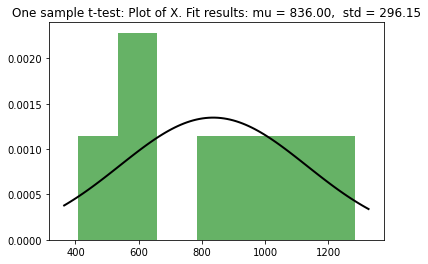

The null hypothesis is accepted
The T-statistic value =  0.9724974461034555
The t_alpha_by2 value for 95% statistical confidence for two tailed test with df=6 is 2.447


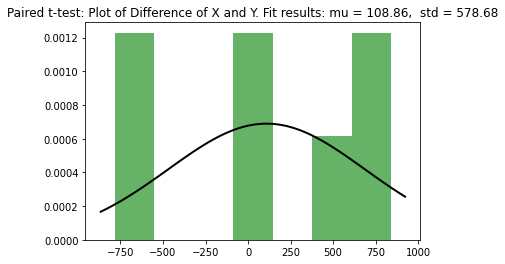

The null hypothesis is accepted
The T-statistic value =  0.49770331104030274
The t_alpha_by2 value for 95% statistical confidence for two tailed test with df=6 is 2.447


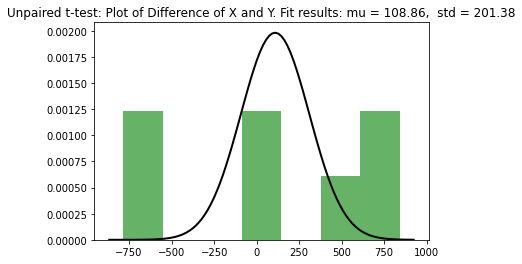

The null hypothesis is accepted
The T-statistic value =  0.5405668224869311
The t_alpha_by2 value for 95% statistical confidence for two tailed test with df=12 is 2.179


In [0]:
LAaprilLastWeekdata = LAdata.loc[(LAdata['date']>='2020-04-22')&(LAdata['date']<='2020-04-28')]
LAaprilPrevToLastWeekdata = LAdata.loc[(LAdata['date']>='2020-04-15')&(LAdata['date']<='2020-04-21')]

one_sample_T_test(np.array(LAaprilLastWeekdata.new_confirmed_cases), LAaprilPrevToLastWeekdata["new_confirmed_cases"].mean())
paired_T_test(np.array(LAaprilLastWeekdata.new_confirmed_cases), np.array(LAaprilPrevToLastWeekdata.new_confirmed_cases))
unpaired_T_test(np.array(LAaprilLastWeekdata.new_confirmed_cases), np.array(LAaprilPrevToLastWeekdata.new_confirmed_cases))

## T-test Observations:
**Confirmed Cases**

For one sample test, the Null hypothesis is that the mean of COVID19 #cases of last week (sample distribution) is same as that of the mean of second last week (guess value).
Alternate hypothesis is that mean of COVID19 confirmed cases of last week is not same as the mean of second last week (guess value). As t-statistic value is 0.9725 < 2.447, null hypothesis is accepted.

For two sample test, the null hypothesis is that the mean of COVID19 #cases is same for both the second last week and last week, given that both the samples come from the same distribution for paired t-test and they come from different distributions for unpaired t-test.
Alternate hypothesis is that the means are different for both the samples.
 As t-statistic value is 0.4977 < 2.447 for paired t-test and 0.5406 < 2.179 for unpaired t-test, null hypothesis is accepted in both the cases.

**#Deaths**

For one sample test, the Null hypothesis is that the mean of COVID19 #deaths of last week (sample distribution) is same as that of the mean of second last week (guess value).
Alternate hypothesis is that mean of COVID19 deaths is different for last week when compared to the mean of second last week (guess value).
As t-statistic value is 0.9029 < 2.447, null hypothesis is accepted.

For two sample test, the null hypothesis is that the mean of COVID19 #deaths is same for both the second last week and last week, given that both the samples come from the same distribution for paired t-test and they come from different distributions for unpaired t-test.
Alternate hypothesis is that the means are different for both the samples. 
As t-statistic value is 0.8549 < 2.447 for paired t-test and 0.6038 < 2.179 for unpaired t-test, null hypothesis is accepted in both the cases.

##Z-Test

In [0]:
#For New Confirmed cases
import statistics,math

def Z_Test():
    #Get the Data for last and second last week
    Last_Week = df_merge['new_confirmed_cases'][-7:]
    Second_Last_Week = df_merge['new_confirmed_cases'][-14:-7]

    #Get the mean
    x_mean = sum(Last_Week)/len(Last_Week)
    y_mean = sum(Second_Last_Week)/len(Second_Last_Week)

    #Compute the Sigma and Calculate Z-Statistic
    sigma = statistics.stdev(df_merge['new_confirmed_cases'])
    Z_Stat = (x_mean - y_mean) / ( sigma/math.sqrt(len(Last_Week)) )
    if abs(Z_Stat) < 1.96:
        return "Z_Test: Means are similar from second last week to last week"
    return "Z_Test: Means are not similar from second last week to last week"

df_merge=pd.read_csv('New_Covid_Crime.csv')
Z_Test()

'Z_Test: Means are similar from second last week to last week'

###Result

Z_Test: Means are similar from second last week to last week for new confirmed cases

In [0]:
#For New Deaths
import statistics,math

def Z_Test():
    #Get the Data for last and second last week
    Last_Week = df_merge['new_deaths'][-7:]
    Second_Last_Week = df_merge['new_deaths'][-14:-7]

    #Get the mean
    x_mean = sum(Last_Week)/len(Last_Week)
    y_mean = sum(Second_Last_Week)/len(Second_Last_Week)

    #Compute the Sigma and Calculate Z-Statistic
    sigma = statistics.stdev(df_merge['new_deaths'])
    Z_Stat = (x_mean - y_mean) / ( sigma/math.sqrt(len(Last_Week)) )
    if abs(Z_Stat) < 1.96:
        return "Z_Test: Means are similar from second last week to last week"
    return "Z_Test: Means are not similar from second last week to last week"

Z_Test()

'Z_Test: Means are similar from second last week to last week'

###Result

Z_Test: Means are similar from second last week to last week for new deaths

# Required Inference 3

### Permutation Test

In [0]:
data = pd.read_csv(r'New_Covid_Crime.csv')
df = pd.DataFrame(data, columns = ['date', 'new_confirmed_cases','new_deaths'])
start_date = "2020-04-26"
end_date = "2020-05-02"
after_start_date = df["date"] >= start_date
before_end_date = df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]
#To get data for confirmed cases and deaths for last week
lastweek=filtered_dates
start_date = "2020-04-19"
end_date = "2020-04-25"
after_start_date = df["date"] >= start_date
before_end_date = df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]
#To get data for confirmed cases and deaths for second last week
secondweek=filtered_dates


In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson
def permutationtest(data1,data2):
    mean_data1 = np.mean(data1)
    mean_data2 = np.mean(data2)
    diff = abs(mean_data1 - mean_data2)
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)
    count = 0
    max = 0
    #n is the number of permutations,here testing it for 7! permutations
    n=5040
    for i in range(n):
        #for generating permutations
        combined_data = np.random.permutation(np.concatenate((data1, data2), axis=0))
        data = np.split(combined_data, [len(data1), len(data1)+len(data2)])
        data1 = data[0]
        data2 = data[1]
        #finding max|mean of data1-mean of data 2|
        if max < abs(np.mean(data1) - np.mean(data2)):
               max = abs(np.mean(data1) - np.mean(data2))
        if (abs(np.mean(data1) - np.mean(data2)) > diff):
            if max < abs(np.mean(data1) - np.mean(data2)):
               max = abs(np.mean(data1) - np.mean(data2))
            count += 1
    #using the formula for calculating p-value
    p_value = 1/n * (count)
    if (p_value < 0.05):
        print("p-value is "+str(p_value) + " Therefore Null Hypothesis is rejected.")  
    else:
        print("p-value is "+str(p_value) + " Therefore Null Hypothesis is accepted.")

In [0]:
secondweek_confirmed_cases=secondweek['new_confirmed_cases']
lastweek_confirmed_cases=lastweek['new_confirmed_cases']
data1 = secondweek_confirmed_cases.to_numpy()
data2=lastweek_confirmed_cases.to_numpy()
print("Inference for confirmed cases")
permutationtest(data1,data2)
print("Inference for #deaths")
secondweek_confirmed_cases=secondweek['new_deaths']
lastweek_confirmed_cases=lastweek['new_deaths']
data1 = secondweek_confirmed_cases.to_numpy()
data2=lastweek_confirmed_cases.to_numpy()
permutationtest(data1,data2)


Inference for confirmed cases
p-value is 0.3773809523809524 Therefore Null Hypothesis is accepted.
Inference for #deaths
p-value is 0.9424603174603174 Therefore Null Hypothesis is accepted.


### Result:
**Confirmed Cases**

The Null hypothesis is that COVID19 confirmed cases of second last week and last week belong to same distribution
Alternate hypothesis is that COVID19 confirmed cases of the second last week to last week is different
As p-value is 0.3823>0.05 hence null hypothesis is accepted

**#Deaths**

The Null hypothesis is that COVID19 #deaths of second last week and last week belong to same distribution
Alternate hypothesis is that COVID19 #deaths of the second last week to last week is different
As p-value is 0.9436>0.05 hence null hypothesis is accepted

Note:The test was considered for 7! permutations

## KS Test

### one sample test

In [0]:
def poissondistribution(data1,data2):
    #mu estimate is mean of second last week data
    mu=np.mean(data1)
    data2=np.sort(data2)
    return poisson.cdf(data2, mu)
def geometricdistribution(data1,data2):
    #p estimate is 1/(mean of second last week data) 
    p=1/(np.mean(data1))
    data2=np.sort(data2)
    return geom.cdf(data2, p)
def binomialdistribution(data1,data2):
    xbar=np.mean(data1)
    data2=np.sort(data2)
    count=0
    for i in data2:
        count=((i-xbar)*(i-xbar))+count
    variance=count/len(data2)
    #finding estimtes for n and p
    n=(xbar*xbar)/(xbar-variance)
    p=(xbar)/n
    print("p estimate value for binomial is "+str(p))
    print("n estimate value for binomial is "+str(n))
    return binom.cdf(data2, n, p)
def ksonesampletest(data1):
    #find the max difference of ecdf of the distributions.
    #if it is greater than the threshold then we reject the hypothesis,else accept.
    dright =[] 
    dleft =[] 
    for count in range(1,8): 
	    x = count / 7 - data1[count-1] 
	    dright.append(x) 
    for count in range(1,8): 
	    y =(count-1)/7
	    y =data1[count-1]-y 
	    dleft.append(y) 
    #to find max D
    maxdifference= max(max(dright, dleft)) 
    if maxdifference>0.05:
        print("D statistic is "+str(maxdifference)+" Hence Null hypothesis is rejected")
    else:
        print("D statistic is "+str(maxdifference)+" Hence Null hypothesis is accepted")

secondweek_confirmed_cases=secondweek['new_confirmed_cases']
lastweek_confirmed_cases=lastweek['new_confirmed_cases']
data1 = secondweek_confirmed_cases.to_numpy()
data2=lastweek_confirmed_cases.to_numpy()
print("Inference for confirmed cases")
print("Geometric")
data=geometricdistribution(data1,data2)
ksonesampletest(data)
print("Poisson")
data=poissondistribution(data1,data2)
ksonesampletest(data)
print("Binomial")
data=binomialdistribution(data1,data2)
ksonesampletest(data)
print("Inference for #deaths")
secondweek_confirmed_cases=secondweek['new_deaths']
lastweek_confirmed_cases=lastweek['new_deaths']
data1 = secondweek_confirmed_cases.to_numpy()
data2=lastweek_confirmed_cases.to_numpy()
print("Geometric")
data=geometricdistribution(data1,data2)
ksonesampletest(data)
print("Poisson")
data=poissondistribution(data1,data2)
ksonesampletest(data)
print("Binomial")
data=binomialdistribution(data1,data2)
ksonesampletest(data)

Inference for confirmed cases
Geometric
D statistic is 0.3310184285988646 Hence Null hypothesis is rejected
Poisson
D statistic is 0.7142379458230935 Hence Null hypothesis is rejected
Binomial
p estimate value for binomial is -145.76836964386206
n estimate value for binomial is -6.966041905452077
D statistic is 1.0 Hence Null hypothesis is rejected
Inference for #deaths
Geometric
D statistic is 0.36550518828587014 Hence Null hypothesis is rejected
Poisson
D statistic is 0.2819586197691209 Hence Null hypothesis is rejected
Binomial
p estimate value for binomial is -3.3954321540528443
n estimate value for binomial is -13.421392772355576
D statistic is 1.0 Hence Null hypothesis is rejected


### Result
**Confirmed Cases**

For one sample ks-test the Null hypothesis is that if the distributions of COVID19 confirmed cases of last week belong to poisson,binomial and geometric distributions(separate inference).
The alternate hypothesis is that the distributions are not.

**#Deaths**

For one sample ks-test the Null hypothesis is that if the distributions of COVID19 #deaths of last week belong to poisson,binomial and geometric distributions.
The alternate hypothesis is that the distributions are not.

For binomial the p and n value is negative implies that the data can not be fit to binomial

### two sample test

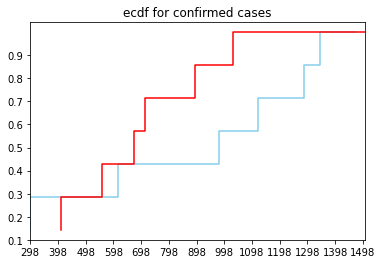

D statistics is 0.4285714285714286 Hence Null hypothesis is rejected
Inference for #deaths


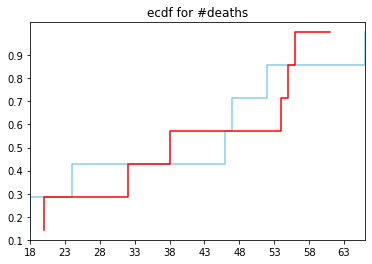

D statistics is 0.28571428571428575 Hence Null hypothesis is rejected


In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson

def ks_testing(data1, data2,header):
    #find the max difference of ecdf of the distributions.
    #if it is greater than the threshold then we reject the hypothesis,else accept.
    cdf_data1 = []
    cdf_data2 = []
    max_diff = 0
    data1, data2 = map(np.asarray, (data1, data2))
    len_data1 = len(data1)
    len_data2 = len(data2)
    data1 = np.sort(data1)
    data_1 = data1
    data2 = np.sort(data2)
    data_2 = data2
    data_combined = np.concatenate([data1,data2])
    data_combined = np.sort(data_combined)
    max_x = np.amax(data_combined)
    min_x = np.amin(data_combined)
    count = 0
    for i in range(len_data1):
        count = count + (1/(1.0*len_data1))
        cdf_data1.append(count)
    count = 0    
    for i in range(len_data2):
        count = count + (1/(1.0*len_data2))
        cdf_data2.append(count)
    index = 0
    n1 = data1.shape[0]
    n2 = data2.shape[0]
    n1 = len(data1)
    n2 = len(data2)
    data1 = np.sort(data1)
    data2 = np.sort(data2)
    data_all = np.concatenate([data1,data2])
    cdf1atpoint = np.searchsorted(data1,data_all,side='right')/(1.0*n1)
    cdf2atpoint = (np.searchsorted(data2,data_all,side='right'))/(1.0*n2)
    #To find max D
    maxdifference = np.max(np.absolute(cdf1atpoint-cdf2atpoint))
    plt.title('ecdf for '+header)
    plt.xlim(min_x, max_x)
    if(header=="confirmed cases"):
        plt.xticks(np.arange(min_x, max_x, 100.0))
    else:
        plt.xticks(np.arange(min_x, max_x, 5.0))
    plt.yticks(np.arange(0, 1, 0.1))
    #Plotting ecdf values
    plt.step(data_1, cdf_data1, color='skyblue')
    plt.step(data_2, cdf_data2, color='red')
    plt.show()
    if maxdifference>0.05:
        print("D statistics is "+str(maxdifference)+" Hence Null hypothesis is rejected")
    else:
        print("D statistic is "+str(maxdifference)+" Hence Null hypothesis is accepted")


secondweek_confirmed_cases=secondweek['new_confirmed_cases']
lastweek_confirmed_cases=lastweek['new_confirmed_cases']
data1 = secondweek_confirmed_cases.to_numpy()
data2=lastweek_confirmed_cases.to_numpy()
header="confirmed cases"
ks_testing(data1,data2,header)
print("Inference for #deaths")
secondweek_confirmed_cases=secondweek['new_deaths']
lastweek_confirmed_cases=lastweek['new_deaths']
data1 = secondweek_confirmed_cases.to_numpy()
data2=lastweek_confirmed_cases.to_numpy()
header="#deaths"
ks_testing(data1,data2,header)


### Result
**Confirmed Cases**

For two sample ks-test the null hypothesis is both last week data and second last week data of confirmed cases come frome same distributions.
Alternate hypothesis is that they come from different distributions.As D statistic is 0.428 > 0.05 hence the null hypothesis is rejected.

**#Deaths**

For two sample test the null hypothesis is both last week data and second last week data of #deaths come frome same distributions.
Alternate hypothesis is that they come from different distributions.
As D statistic is 0.285 > 0.05 hence the null hypothesis is rejected.

# Required Inference 4

## Pearson Correlation

In [0]:
def pearson_corr(data, column1, column2):

  X_bar = data[column1].mean()
  Y_bar = data[column2].mean()
  numerator = 0
  X_diff_sq_sum = 0
  Y_diff_sq_sum = 0

  for i in range(len(data.index)):
    X_diff = (data[column1].iloc[i] - X_bar)
    Y_diff = (data[column2].iloc[i] - Y_bar)
    numerator += X_diff * Y_diff
    X_diff_sq_sum += X_diff * X_diff
    Y_diff_sq_sum += Y_diff * Y_diff

  return numerator / (math.sqrt(X_diff_sq_sum) * math.sqrt(Y_diff_sq_sum))

## Results

### Fatality

Pearson correlation for crime and #deaths in LA: 0.08594325261221726


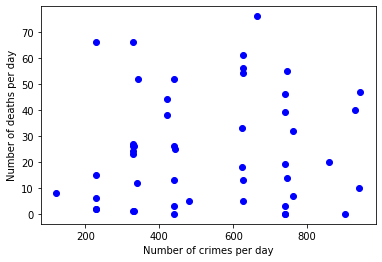

In [0]:
print("Pearson correlation for crime and #deaths in LA: "+str(pearson_corr(covid_crime_data, 'Crime', 'new_deaths')))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = covid_crime_data['Crime']
y = covid_crime_data['new_deaths']
ax.plot(x, y, 'bo')

plt.xlabel("Number of crimes per day")
plt.ylabel("Number of deaths per day")
plt.show()

### Number of cases

Pearson correlation for crime and #cases in LA: 0.13833132434989517


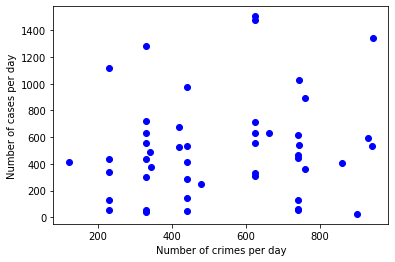

In [0]:
print("Pearson correlation for crime and #cases in LA: "+str(pearson_corr(covid_crime_data, 'Crime', 'new_confirmed_cases')))
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = covid_crime_data['Crime']
y = covid_crime_data['new_confirmed_cases']
ax.plot(x, y, 'bo')

plt.xlabel("Number of crimes per day")
plt.ylabel("Number of cases per day")
plt.show()

## Observations

Pearson correlation values of 0.0859 for number of crimes and deaths per day, and 0.1383 for number of crimes and cases per day reflect the trend of "No Correlation" (Correlation values < 0.5) as can be seen in the above two plots, as the data points are scattered all over the place for both #Crimes vs #Deaths and #Crimes vs #Cases plots.

# Required Inference 5

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Grouper
from scipy.interpolate import UnivariateSpline
from scipy.stats import norm

# Reading the data from the .txt file and extracting the data of los angeles county
data = pd.read_csv('covidLA.txt',sep=',')
data['date'] = pd.to_datetime(data['date'])
LAdata = data[data['county']=='Los Angeles']
# Using April month's data for this inference 
LAaprildata = LAdata.loc[LAdata['date']>='2020-04-01']
LAaprildata.head(5)

,date,county,fips,confirmed_cases,deaths,new_confirmed_cases,new_deaths
879,2020-04-01,Los Angeles,37,3528,66,491.0,12.0
880,2020-04-02,Los Angeles,37,4071,80,543.0,14.0
881,2020-04-03,Los Angeles,37,4605,93,534.0,13.0
882,2020-04-04,Los Angeles,37,5325,119,720.0,26.0
883,2020-04-05,Los Angeles,37,5955,132,630.0,13.0


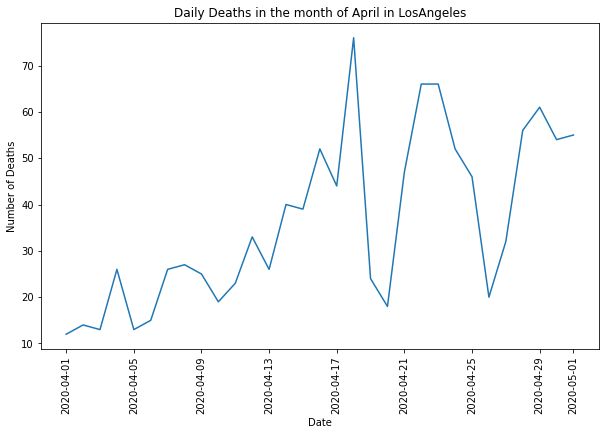

In [0]:
# Plotting daily deaths in the month of April in Los Angeles County
%matplotlib inline

plt.figure(figsize = (10,6))
plt.plot(LAaprildata.date,LAaprildata.new_deaths)
plt.xticks(rotation = 90)
plt.title("Daily Deaths in the month of April in LosAngeles")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()

In [0]:
# Splitting a month's data into weekly data
import math
def get_index(nrows, group_size):
    return range(group_size, math.ceil(nrows / group_size) * group_size, group_size)

def split(df, group_size):
    indxs = get_index(df.shape[0], group_size)
    return np.split(df, indxs)

groups = split(LAaprildata, 7)

## Finding the beta prior of exponential

MME of lambda of poisson = expectation of sample of first week <br>
1. From assumption, Expectation of exponential(1/beta) = lambda_mme <br>
2. From definition, Expectation of exponential(1/beta) = beta <br>

From 1 and 2, <br>
beta = lambda_mme

lambda_mme of poisson distribution is the mean of the sample data.
So beta = Mean of data of the first week. 

In [0]:
lambda_mme = groups[0]['new_deaths'].mean()
beta_prior = lambda_mme
beta_prior

17.0

**The derivation of the gamma posterior function from the poisson likelihood and a exponential posterior has been done and been provided in the gamma.pdf in the same folder int .**

The MAP for the iteration 1 is : 16.862862862862862
The MAP for the iteration 2 is : 22.2022022022022
The MAP for the iteration 3 is : 29.04104104104104
The MAP for the iteration 4 is : 33.845845845845844


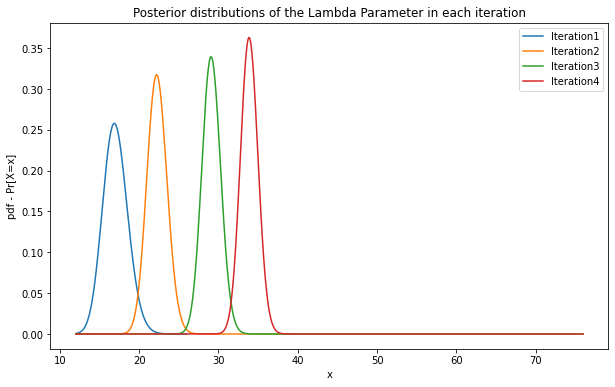

In [0]:
# The likelihood of poisson * prior of exponential turned out to be a gamma distribution with parameters
# alpha = n*mean(x1...xn) and beta = n+(1/beta_prior)

from scipy.stats import gamma
X = []
plt.figure(figsize=(10,6))

# Plot of the posterior distribution of Lambda after seeing new weekly data 
for i in range(4):
    X.extend(groups[i].new_deaths)
    Xmin = min(X)
    Xmax = max(X)
    domain = np.linspace(Xmin, Xmax, 1000)
    n = len(X)
    mean = np.mean(X)
    alpha = (n*mean)+1
    beta = n+(1/beta_prior)
    # Gamma PDF
    gamma_pdf = gamma.pdf(domain, a = alpha, scale = float(1)/beta)
    
    print("The MAP for the iteration " + str(i+1)+ " is : " + str(domain[np.argmax(gamma_pdf)]))
    plt.plot(domain, gamma_pdf, label="Iteration"+str(i+1))


plt.legend()
plt.xlabel("x")
plt.ylabel("pdf - Pr[X=x]")
plt.title('Posterior distributions of the Lambda Parameter in each iteration')
plt.show()



# Open Ended Inference - 1
### Does the crimes on male and female changes with covid?

Basically we are testing if crimes on gender depends on covid. Here to test this we see if the distributions are independent/depenedent on each other.
To accomplish this task, we used Chi-Square test. The Null hypothesis is "The crimes on gender depends on covid situation". The alternate hypothesis is 
"The crimes on gender does not depend on covid situation". Assuming that null hypotheses is true, we find the expected values of each category using 
observed values. Here the four groups are crimes on male - before covid, crimes on female - before covid, crimes on male - after covid, crimes on female - after covid.
The alpha value is taken as 0.05. The degrees of freedom is (rows - 1) * (columns - 1) = (2-1) * (2-1) = 1.


In [0]:
from datetime import datetime
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2


data = pd.read_csv("CrimeData.csv",header = None)
covid_diff = datetime.strptime('2020-03-03', '%Y-%m-%d')
obs_before_covid_female = 0
obs_before_covid_male = 0
obs_after_covid_male = 0
obs_after_covid_female = 0
degree_of_freedom = 1
dates = data[2].tolist()
sex = data[11].tolist()
alpha = 0.05
sex = sex[1:len(sex)]
dates = dates[1:len(dates)]

#Calculating observed values
for i in range(0, len(dates)):
    curr_date = datetime.strptime(dates[i][:-5],"%m/%d/%Y")
    if (curr_date < covid_diff and sex[i] == 'F'):
        obs_before_covid_female = obs_before_covid_female + 1
    elif (curr_date < covid_diff and sex[i] == 'M'):
        obs_before_covid_male = obs_before_covid_male + 1
    elif (curr_date > covid_diff and sex[i] == 'F'):
        obs_after_covid_female = obs_after_covid_female + 1
    elif (curr_date > covid_diff and sex[i] == 'M'):
        obs_after_covid_male = obs_after_covid_male + 1

total = obs_before_covid_female + obs_before_covid_male + obs_after_covid_female + obs_after_covid_male
exp_before_covid_female = ((obs_before_covid_female + obs_after_covid_female)/total) * (obs_before_covid_female + obs_before_covid_male)
exp_before_covid_male = ((obs_before_covid_male + obs_after_covid_male)/total) * (obs_before_covid_female + obs_before_covid_male)
exp_after_covid_female = ((obs_before_covid_female + obs_after_covid_female)/total) * (obs_after_covid_female + obs_after_covid_male)
exp_after_covid_male = ((obs_before_covid_male + obs_after_covid_male)/total) * (obs_after_covid_female + obs_after_covid_male)

#Finding chi-squre val
Q_observed = (((exp_before_covid_female - obs_before_covid_female) ** 2) / exp_before_covid_female)+(((exp_before_covid_male - obs_before_covid_male) ** 2) / exp_before_covid_male)+(((exp_after_covid_female - obs_after_covid_female) ** 2) / exp_after_covid_female)+(((exp_after_covid_male - obs_after_covid_male) ** 2) / exp_after_covid_male)
critical_value = chi2.ppf(1-alpha, degree_of_freedom)

if Q_observed > critical_value:
    print('We reject the null hypotheses and accept H1. The distributions are independent.')
else:
    print('We accept the null hypotheses and reject H1. The distributions are dependent.')
    
    



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,4,6,7,8,10,12,16,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We reject the null hypotheses and accept H1. The distributions are independent.


### Test Results:
Here we get observed_chi is greater than critical value. So reject the null hypotheses, which is the distributions are independent on each other.

# Open Ended Inference - 2
## Did Covid data change after the lockdown?

In this inference we are going to find out if the covid data changed after the lockdown was imposed in los angeles. 
The lockdown was imposed in LA on 20th march. So we are going to use the covid data before the lockdown and after the lockdown
to check if the data has changed or not. For this purpose we are going to use the right tailed paired t test to see the change in the data before the lockdown and after the lock down. 

We are going to do use different scenarios to infer about the data. We are going to do several right tailed paired t-test to check if the number cases and number of deaths increased or decreased by taking two different weeks data. These data are
1. number of cases - week before and two weeks after the lockdown.
2. number of cases - second week after the lockdown and third week after the lockdown.
3. number of cases - third week after the lockdown and fourth week after the lockdown.
4. number of deaths - week before and two weeks after the lockdown.
5. number of deaths - second week after the lockdown and third week after the lockdown.
6. number of deaths - third week after the lockdown and fourth week after the lockdown.

To check the effect of lockdown we are also comparing the weeks after the lockdown because it will give a stronger inference because we do not know what other factors affect the number of cases so only comparing the data before and after lockdown will not suffice. By comparing the 3rd and 4th week of data after the lockdown, we would get a stronger inference on the data and a clear idea of how the cases or the deaths are varying. 

I have also taken data only two weeks after the lockdown was announced because the effect of lockdown is not going to be immediate and therefore did not consider the data right after the lockdown.



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Grouper
from datetime import datetime, timedelta
from math import sqrt

data = pd.read_csv('covidLA.txt',sep=',')
data['date'] = pd.to_datetime(data['date'])
LAdata = data[data['county']=='Los Angeles']

**Getting the data for various weeks so that it could be used for the inference below.**

In [0]:

# data of the week before the lockdown that is from 12th march to 19th march

# lockdown_date = datetime.strptime("2020-03-20", "%Y-%m-%d").date()
lockdown_date = pd.Timestamp("2020-03-20")

#date after three weeks of lockdown 
a_lockdown_begindate = lockdown_date + timedelta(days=14)
a_lockdown_enddate = lockdown_date + timedelta(days=21)
lockdown_begindate = lockdown_date + timedelta(days=0)
lockafter2_begindate = lockdown_date + timedelta(days=21)
lockafter2_enddate = lockdown_date + timedelta(days=28)
lockafter3_begindate = lockdown_date + timedelta(days=28)
lockafter3_enddate = lockdown_date + timedelta(days=35)

b_lock_data = LAdata.loc[(LAdata['date']>='2020-03-12') & (LAdata['date']<='2020-03-19')]
lockdown_data = LAdata.loc[(LAdata['date']>=lockdown_date) & (LAdata['date']<=a_lockdown_begindate)]
a_lock_data_2 = LAdata.loc[(LAdata['date']>=a_lockdown_begindate) & (LAdata['date']<=a_lockdown_enddate)]
a_lock_data_3 = LAdata.loc[(LAdata['date']>=lockafter2_begindate) & (LAdata['date']<=lockafter2_enddate)]
a_lock_data_4 = LAdata.loc[(LAdata['date']>=lockafter3_begindate) & (LAdata['date']<=lockafter3_enddate)]

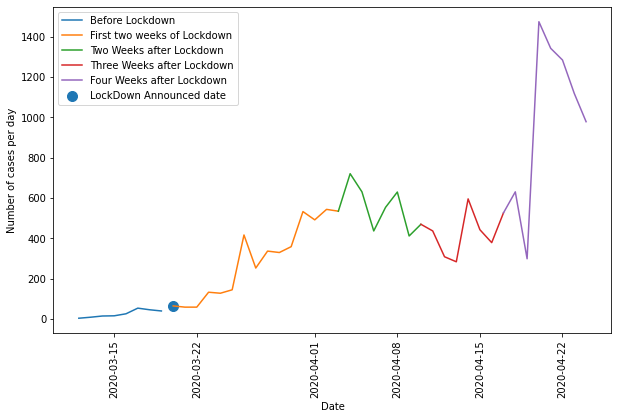

In [0]:
# plotting the number of cases weekly
%matplotlib inline

plt.figure(figsize = (10,6))
plt.plot(b_lock_data.date,b_lock_data.new_confirmed_cases,label = 'Before Lockdown')
plt.plot(lockdown_data.date,lockdown_data.new_confirmed_cases,label = 'First two weeks of Lockdown')
plt.plot(a_lock_data_2.date,a_lock_data_2.new_confirmed_cases,label = 'Two Weeks after Lockdown')
plt.plot(a_lock_data_3.date,a_lock_data_3.new_confirmed_cases, label = 'Three Weeks after Lockdown')
plt.plot(a_lock_data_4.date,a_lock_data_4.new_confirmed_cases, label = 'Four Weeks after Lockdown')


lockdowncases = LAdata[LAdata['date']==lockdown_date]['new_confirmed_cases']
plt.scatter(lockdown_date,lockdowncases,label = 'LockDown Announced date',s = 100)
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Number of cases per day")
plt.legend()
plt.show()



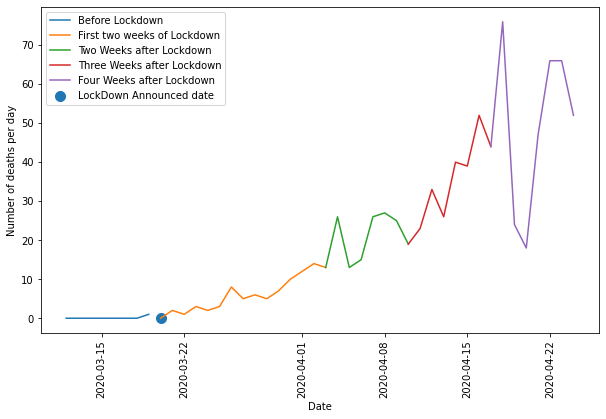

In [0]:
# plotting the number of deaths weekly
%matplotlib inline

plt.figure(figsize = (10,6))
plt.plot(b_lock_data.date,b_lock_data.new_deaths,label = 'Before Lockdown')
plt.plot(lockdown_data.date,lockdown_data.new_deaths,label = 'First two weeks of Lockdown')
plt.plot(a_lock_data_2.date,a_lock_data_2.new_deaths,label = 'Two Weeks after Lockdown')
plt.plot(a_lock_data_3.date,a_lock_data_3.new_deaths, label = 'Three Weeks after Lockdown')
plt.plot(a_lock_data_4.date,a_lock_data_4.new_deaths, label = 'Four Weeks after Lockdown')

lockdowndeaths = LAdata[LAdata['date']==lockdown_date]['new_deaths']
plt.scatter(lockdown_date,0,label = 'LockDown Announced date',s = 100)
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Number of deaths per day")
plt.legend()
plt.show()

Test 1 

T test for finding if the number of cases two weeks after the lockdown increased or decreased/remained equal when compared to the cases before the lockdown
H0 = The number of cases two weeks after the lockdown increased
H1 = The number of cases two weeks after the lockdown decreased or remained equal


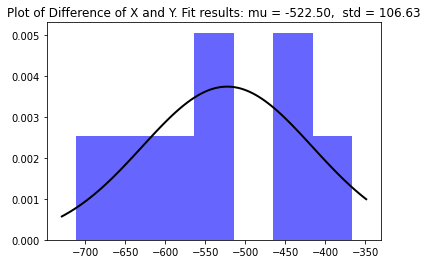

The null hypothesis is accepted
The T-statistic value =  -13.85900203422219
The t_alpha value for 95% statistical confidence for right tailed test = 1.943
----------------------------------------------------------------------------------------------------------

Test 2 

T test for finding if the number of cases three weeks after the lockdown increased or decreased/remained equal when compared to the cases two weeks after the lockdown
H0 = The number of cases three weeks after the lockdown increased when compared to the cases two weeks after the lockdown 
H1 = The number of cases three weeks after the lockdown decreased or remained equal when compared to the cases two weeks after the lockdown


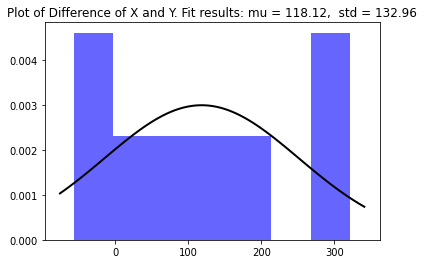

The null hypothesis is rejected
The T-statistic value =  2.512934625468628
The t_alpha value for 95% statistical confidence for right tailed test = 1.943
----------------------------------------------------------------------------------------------------------
Test 3 

T test for finding if the number of cases four weeks after the lockdown increased or decreased/remained equal when compared to the cases three weeks after the lockdown
H0 = The number of cases four weeks after the lockdown increased when compared to the cases three weeks after the lockdown 
H1 = The number of cases four weeks after the lockdown decreased or remained equal when compared to the cases three weeks after the lockdown


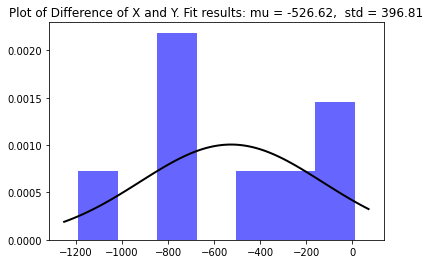

The null hypothesis is accepted
The T-statistic value =  -3.753727505684002
The t_alpha value for 95% statistical confidence for right tailed test = 1.943
----------------------------------------------------------------------------------------------------------
Test 4 

T test for finding if the number of deaths two weeks after the lockdown increased or decreased/remained equal when compared to the deaths before the lockdown
H0 = The number of deaths two weeks after the lockdown increased
H1 = The number of deaths two weeks after the lockdown decreased or remained equal


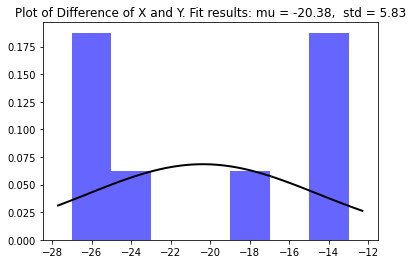

The null hypothesis is accepted
The T-statistic value =  -9.8855984882689
The t_alpha value for 95% statistical confidence for right tailed test = 1.943
----------------------------------------------------------------------------------------------------------
Test 5 

T test for finding if the number of deaths three weeks after the lockdown increased or decreased/remained equal when compared to the deaths two weeks after the lockdown
H0 = The number of deaths three weeks after the lockdown increased when compared to the deaths two weeks after the lockdown 
H1 = The number of deaths three weeks after the lockdown decreased or remained equal when compared to the deaths two weeks after the lockdown


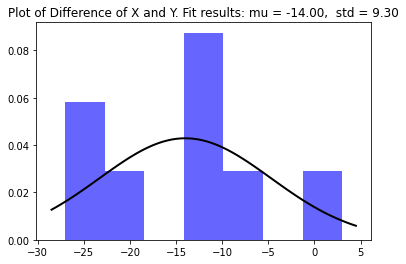

The null hypothesis is accepted
The T-statistic value =  -4.257601159110351
The t_alpha value for 95% statistical confidence for right tailed test = 1.943
----------------------------------------------------------------------------------------------------------
Test 6 

T test for finding if the number of deaths four weeks after the lockdown increased or decreased/remained equal when compared to the deaths three weeks after the lockdown
H0 = The number of deaths four weeks after the lockdown increased when compared to the deaths three weeks after the lockdown 
H1 = The number of deaths four weeks after the lockdown decreased or remained equal when compared to the deaths three weeks after the lockdown


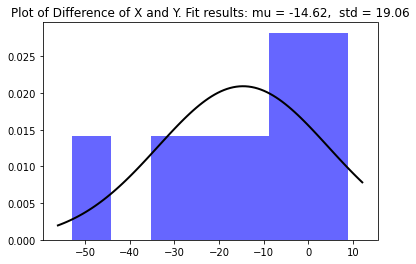

The null hypothesis is accepted
The T-statistic value =  -2.1704380649371737
The t_alpha value for 95% statistical confidence for right tailed test = 1.943


In [0]:
# performing the right tailed paired t-test
def T_test(X,Y):
    D = X-Y

    # Plotting the difference of the X and Y
    mu, std = norm.fit(D)
    plt.hist(D, bins=7, density=True, alpha=0.6, color='b')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Plot of Difference of X and Y. Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()
    
    n = len(D)
    sample_std = np.std(D)
    # Calculating the t-statistic 
    t_statistic = ((np.mean(D)/sample_std)*sqrt(n))


    # t_alpha (right tailed t test) for df = 6 and significant value of 0.05. This is obatined from the T-table.
    t_alpha = 1.943

    if t_statistic > t_alpha:
        print('The null hypothesis is rejected')
    else:
        print('The null hypothesis is accepted')
    print('The T-statistic value = ', str(t_statistic))
    print('The t_alpha value for 95% statistical confidence for right tailed test = ' + str(t_alpha))
    

print("Test 1 \n")
print("T test for finding if the number of cases two weeks after the lockdown increased or decreased/remained equal when compared to the cases before the lockdown")
print("H0 = The number of cases two weeks after the lockdown increased")
print("H1 = The number of cases two weeks after the lockdown decreased or remained equal")

X1 = np.array(b_lock_data.new_confirmed_cases)
Y1 = np.array(a_lock_data_2.new_confirmed_cases)
T_test(X1,Y1)

print("----------------------------------------------------------------------------------------------------------\n")

print("Test 2 \n")
print("T test for finding if the number of cases three weeks after the lockdown increased or decreased/remained equal when compared to the cases two weeks after the lockdown")
print("H0 = The number of cases three weeks after the lockdown increased when compared to the cases two weeks after the lockdown ")
print("H1 = The number of cases three weeks after the lockdown decreased or remained equal when compared to the cases two weeks after the lockdown")

X2 = np.array(a_lock_data_2.new_confirmed_cases)
Y2 = np.array(a_lock_data_3.new_confirmed_cases)
T_test(X2,Y2)

print("----------------------------------------------------------------------------------------------------------")

print("Test 3 \n")
print("T test for finding if the number of cases four weeks after the lockdown increased or decreased/remained equal when compared to the cases three weeks after the lockdown")
print("H0 = The number of cases four weeks after the lockdown increased when compared to the cases three weeks after the lockdown ")
print("H1 = The number of cases four weeks after the lockdown decreased or remained equal when compared to the cases three weeks after the lockdown")

X3 = np.array(a_lock_data_3.new_confirmed_cases)
Y3 = np.array(a_lock_data_4.new_confirmed_cases)
T_test(X3,Y3)

print("----------------------------------------------------------------------------------------------------------")

print("Test 4 \n")
print("T test for finding if the number of deaths two weeks after the lockdown increased or decreased/remained equal when compared to the deaths before the lockdown")
print("H0 = The number of deaths two weeks after the lockdown increased")
print("H1 = The number of deaths two weeks after the lockdown decreased or remained equal")


X1 = np.array(b_lock_data.new_deaths)
Y1 = np.array(a_lock_data_2.new_deaths)
T_test(X1,Y1)

print("----------------------------------------------------------------------------------------------------------")

print("Test 5 \n")
print("T test for finding if the number of deaths three weeks after the lockdown increased or decreased/remained equal when compared to the deaths two weeks after the lockdown")
print("H0 = The number of deaths three weeks after the lockdown increased when compared to the deaths two weeks after the lockdown ")
print("H1 = The number of deaths three weeks after the lockdown decreased or remained equal when compared to the deaths two weeks after the lockdown")

X2 = np.array(a_lock_data_2.new_deaths)
Y2 = np.array(a_lock_data_3.new_deaths)
T_test(X2,Y2)

print("----------------------------------------------------------------------------------------------------------")

print("Test 6 \n")
print("T test for finding if the number of deaths four weeks after the lockdown increased or decreased/remained equal when compared to the deaths three weeks after the lockdown")
print("H0 = The number of deaths four weeks after the lockdown increased when compared to the deaths three weeks after the lockdown ")
print("H1 = The number of deaths four weeks after the lockdown decreased or remained equal when compared to the deaths three weeks after the lockdown")

X3 = np.array(a_lock_data_3.new_deaths)
Y3 = np.array(a_lock_data_4.new_deaths)
T_test(X3,Y3)

# The result contains plots of the difference of the datasets considered for the paired right tailed t test. The test is applicable only 
# when the difference is normal. I spoke with the with professor about this. He said its okie even if it is not normal. So I just
# drew the plots assuming that it is normal.

## About the Inferences Result

1. From test 1, the null hypothesis got accepted. We can observe that the number of cases did not decrease 2 weeks after the lockdown when compared to cases before the lockdown. This means that the lockdown did not have any effect on covid 19 cases after two weeks. 

2. From test 2, the null hypothesis got rejected. We can observe that the number of cases did decrease 3 weeks after the lockdown when compared to 2 weeks after the lockdown.

3. From test 3, the null hypothesis got accepted. We can observe that the number of cases did not decrease 4 weeks after the lockdown when compared to 3 weeks after the lockdown.

4. From test 4, the null hypothesis got accepted. We can observe that the number of deaths did not decrease 2 weeks after the lockdown when compared to cases before the lockdown. This means that the lockdown did not have any effect on covid 19 deaths after two weeks.  

5. From test 5, the null hypothesis got accepted. We can observe that the number of deaths did not decrease 3 weeks after the lockdown when compared to 2 weeks after the lockdown.

3. From test 6, the null hypothesis got accepted. We can observe that the number of deaths did not decrease 4 weeks after the lockdown when compared to 3 weeks after the lockdown.






# Open Ended Inference 3 : Linear Regression

In [0]:
import pandas as pd

df_merge=pd.read_csv('New_Covid_Crime.csv')

0.9661662111888689 2.2102570760764593


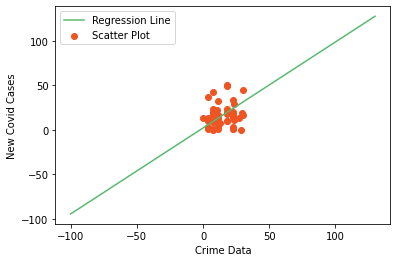

In [0]:
import numpy as np
import matplotlib.pyplot as plt

X = df_merge['Crime'].values
Y = df_merge['new_confirmed_cases'].values


mean_x = np.mean(X)
mean_y = np.mean(Y)

m = len(X)

X=((X-X.min())/(X.max()-X.min()))*30
Y=((Y-Y.min())/(Y.max()-Y.min()))*50
num = 0
den = 0
for i in range(m):
    num += (X[i] - mean_x) * (Y[i] - mean_y)
    den += (X[i] - mean_x) ** 2
b1 = num / den
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Crime Data')
plt.ylabel('New Covid Cases')
plt.legend()
plt.show()

Here we are trying to predict the new cases in Los Angeles based upon the crime data. The above plot shows how predicted regresion line fits the data points(Crime data). 
Scatterplot represents the Crime data, and the Predicted value of new cases corresponsing to that crime data lies on the plotted regression line.

To calculate for residual or error term Epsilon we use root mean square.


##Root Mean Square Error - Linear Regression

In [0]:
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

13.8704628236095


The root mean square error is used to check for the error in predicted values against the original values using the test dataset.